# RL Circuit

## Import and Formatting

The goal of this section is to import all the necessary files and libraries required for the subsequent data analysis.  
It also includes setting up the formatting parameters for the plots and visualizations.

### Import

In [1]:
# ----  Standard import
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate

# ----- Spice import
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *

### Formatting

Adjusting Plotly chart settings for clarity and consistency.

In [2]:
# ----  Formatting charts
%matplotlib inline
from IPython.core.pylabtools import figsize
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 2.0
mpl.rcParams['axes.edgecolor']  = "#bcbcbc"
mpl.rcParams['patch.linewidth'] = 0.5
mpl.rcParams['legend.fancybox'] = True
mpl.rcParams['axes.facecolor']  = "#eeeeee"
mpl.rcParams['axes.labelsize']  = "large"
mpl.rcParams['axes.grid']       = True
mpl.rcParams['grid.linestyle']  = "--"
mpl.rcParams['patch.edgecolor'] = "#eeeeee"
mpl.rcParams['axes.titlesize']  = "x-large"

## Introduction

RC circuits are very **common electronic circuits**.  
They are composed of **one resistor** and **one capacitor**.  
There are **four basic RC circuit configurations**.

* **First configuration: series RC circuit**  
  The resistor and the capacitor are connected **in series**, between `Vin` and `Vout`.

  ```text
  Vin ── R ── C ── Vout
  ````

* **Second configuration: parallel RC circuit**
  The resistor and the capacitor are connected **in parallel** between two nodes.

  ```text
          ┌─ R ─┐
  Vin ────┤     ├── GND
          └─ C ─┘
  ```

---

* **Third configuration: RC low-pass structure**
  The resistor is connected between `Vin` and `Vout`, and the capacitor is connected to ground.

  ```text
  Vin ── R ──┬── Vout
             |
             C
             |
            GND
  ```

* **Fourth configuration: inverted RC structure**
  This circuit is similar to the third one, but the resistor and the capacitor are **swapped**.

  ```text
  Vin ── C ──┬── Vout
             |
             R
             |
            GND
  ```

The goal of this section is to **study and analyze all these RC circuit configurations**.

## RC Low-Pass Configuration

This RC circuit is particularly interesting to study because it represents one of the **simplest and most important analog filters**: the **first-order low-pass filter**.

### Circuit Description

The circuit is very simple:
- the **resistor** is connected between `Vin` and `Vout`
- the **capacitor** is connected between `Vout` and ground

The circuit is shown in  [](#low_pass_order_1).

```{figure} ./images/low_pass_order_1.svg
:name: low_pass_order_1
:align: center
:width: 400px

First-order RC low-pass filter
````

### Why Is This Circuit a Low-Pass Filter?

Before analyzing the circuit mathematically, it is essential to understand **why this configuration behaves as a low-pass filter**.

A low-pass filter allows low-frequency signals to pass while attenuating high-frequency signals.


#### Capacitor Impedance Reminder

The impedance of a capacitor is given by:

$$Z_C = \frac{1}{j\omega C}$$

where:
* $Z_C$ is the capacitor impedance (in ohms)
* $\omega$ is the angular frequency (in rad/s)
* $C$ is the capacitance (in farads)

From this equation, we observe:

* when $\omega$ is **low**, $|Z_C|$ is **large**
* when $\omega$ is **high**, $|Z_C|$ is **small**

#### Frequency Behavior of the Circuit

This frequency-dependent behavior of the capacitor explains the filtering effect:

* **At low frequencies**
  The capacitor impedance is high, so very little current flows through it.
  As a result, most of the input voltage appears at `Vout`.

* **At high frequencies**
  The capacitor impedance is low, so the signal is effectively shunted to ground.
  The output voltage becomes very small.

This behavior is illustrated in [](#low_pass_order_1_higth_low_frequence).

```{figure} ./images/low_pass_order_1_higth_low_frequence.svg
:name: low_pass_order_1_higth_low_frequence
:align: center
:width: 400px

First-order RC low-pass filter: low- and high-frequency behavior
```

#### Impedance and Voltage Divider

The resistor and the capacitor form a **frequency-dependent voltage divider**.

The magnitude of the total impedance is:

$$Z = R_1 + X_{C1}$$

where $X_{C1}$ is the capacitive reactance.

The output voltage can therefore be written as:

$$V_{out} = V_{in} \cdot \frac{X_{C1}}{R_1 + X_{C1}}$$

or equivalently:

$$V_{out} = V_{in} \cdot \frac{X_{C1}}{Z}$$

In the next step, the goal is to **compute the frequency response** using the **transfer function of the RC circuit**.

### Transfer Function of the RC Circuit

The transfer function is defined as the ratio between the output and the input in the frequency domain:

$$H(j\omega) = \frac{V_{out}(j\omega)}{V_{in}(j\omega)}$$

From the previous results, this expression can be rewritten as:

$$H(j\omega) = \frac{V_{in} \cdot \frac{X_{C1}}{R_1 + X_{C1}}}{V_{in}}$$

The input voltage $V_{in}$ can be canceled, leading to:

$$H(j\omega) = \frac{X_{C1}}{R_1 + X_{C1}}$$

Substituting the expression of the capacitive reactance:

$$H(j\omega) = \frac{\frac{1}{j\omega C}}{R_1 + \frac{1}{j\omega C}}$$

Rewriting the denominator:

$$H(j\omega) = \frac{\frac{1}{j\omega C}}{\frac{1 + R_1 j\omega C}{j\omega C}}$$

The term $\frac{1}{j\omega C}$ can be simplified, yielding the final form of the transfer function:

$$H(j\omega) = \frac{1}{1 + R_1 j\omega C}$$

From this expression, the **magnitude** and **phase** of the transfer function can be derived.

* **Magnitude**

$$|H(\omega)| = \frac{1}{\sqrt{1 + (R_1 \omega C)^2}}$$

* **Phase**

$$\Phi(\omega) = -\arctan(R_1 \omega C)$$

#### Asymptotic Gain Behavior

* **Low-frequency region** $\omega \ll \frac{1}{RC}$

$$|H(\omega)| \approx \frac{1}{\sqrt{1 + (R_1 \omega C)^2}}$$

At $\omega = 0$:

$$|H(0)| = \frac{1}{\sqrt{1 + (R_1 \cdot 0 \cdot C)^2}} = 1$$

$$G_{dB} \approx 0 \ \text{dB}$$

This means that low-frequency signals pass through the filter without attenuation.

* **High-frequency region** $\omega \gg \frac{1}{RC}$

At high frequencies, the magnitude becomes:

$$|H(\omega)| = \frac{1}{\sqrt{1 + (R_1 \omega C)^2}} \approx \frac{1}{R_1 \omega C}$$

The gain expressed in decibels is therefore:

$$G_{dB} = -20 \cdot \log_{10}(R_1 \omega C)$$

To evaluate the slope of the asymptotic response, consider two frequencies separated by one decade, such that $\omega_1 = 10 \cdot \omega_2$:

$$
\begin{aligned}
G_{1,dB} - G_{2,dB} &= -20 \log_{10}(R_1 \omega_1 C) + 20 \log_{10}(R_1 \omega_2 C) \\
G_{1,dB} - G_{2,dB} &= 20 \log_{10}\left(\frac{R_1 \omega_2 C}{10 R_1 \omega_2 C}\right) \\
G_{1,dB} - G_{2,dB} &= 20 \log_{10}\left(\frac{1}{10}\right) \\
G_{1,dB} - G_{2,dB} &= -20 \ \text{dB}
\end{aligned}
$$


This shows that **for each decade increase in frequency, the output gain decreases by 20 dB**, which is characteristic of a **first-order low-pass filter**.

The next step is to **simulate this RC low-pass filter** in order to visualize its frequency response and confirm the theoretical analysis.

#### Simulation

##### Spice

In [3]:
# ============================================================
# RC circuit parameters
# ============================================================

R1 = 10          # Resistance value in Ohms
C1 = 200         # Capacitance value in nF
amplitude = 1.7  # Input signal amplitude (Volts)

# Conversion for analytical calculations
C1_analytical = C1 * 1e-9  # Capacitance in Farads

In [4]:
# ============================================================
# SPICE circuit definition
# ============================================================

circuit = Circuit('RC Low-Pass Circuit')

# Sinusoidal input voltage source
circuit.SinusoidalVoltageSource(
    'vin',
    'vin',
    circuit.gnd,
    amplitude=amplitude @ u_V,
    frequency=1 @ u_Hz
)

# RC components
circuit.R(1, 'vin', 'vout', R1 @ u_Ohm)
circuit.C(1, 'vout', circuit.gnd, C1 @ u_nF);

In [5]:
# ============================================================
# AC simulation (frequency-domain analysis)
# ============================================================

simulator = circuit.simulator(
    temperature=25,
    nominal_temperature=25
)

analysis = simulator.ac(
    start_frequency=10 @ u_Hz,
    stop_frequency=100 @ u_MHz,
    number_of_points=1000,
    variation='dec'
)

In [6]:
# Extract simulation data
frequency = np.array(analysis.frequency)

gain_simulation = (
    np.abs(np.array(analysis['vout'])) /
    np.abs(np.array(analysis['vin']))
)

phase_simulation = (
    np.angle(np.array(analysis['vout']), deg=True) -
    np.angle(np.array(analysis['vin']), deg=True)
)

##### Analytics

In [7]:
# ============================================================
# Analytical (theoretical) calculations
# ============================================================

frequency_theoretical = np.logspace(2, 8)      # Frequency in Hz
angular_frequency = 2 * np.pi * frequency_theoretical  # rad/s

# Transfer function magnitude and phase
gain_theoretical = 1 / np.sqrt(1 + (R1 * C1_analytical * angular_frequency)**2)
phase_theoretical = np.degrees(-np.arctan(R1 * C1_analytical * angular_frequency))

In [8]:
# Cutoff frequency
cutoff_frequency = 1 / (2 * np.pi * R1 * C1_analytical)
print(f"Cutoff frequency: Fc = {cutoff_frequency:_.0f} Hz")

Cutoff frequency: Fc = 79_577 Hz


##### Graphic

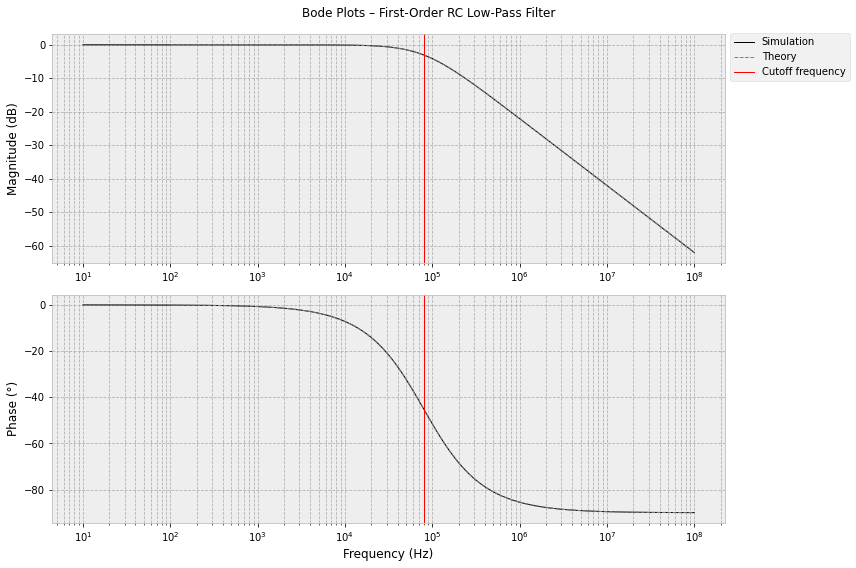

In [9]:
# ============================================================
# Bode plot
# ============================================================

plt.figure(figsize=(12, 8))
plt.suptitle('Bode Plots – First-Order RC Low-Pass Filter')

# ----------------------------
# Magnitude plot
# ----------------------------
plt.subplot(211)

# Simulation results
plt.semilogx(frequency, 20 * np.log10(gain_simulation),
    lw=1, color='black', label='Simulation'
)

# Analytical results
plt.semilogx(frequency_theoretical, 20 * np.log10(gain_theoretical),
    '--', lw=1, color='grey', label='Theory'
)

plt.axvline(cutoff_frequency,
    color='red', lw=1, label='Cutoff frequency'
)

plt.ylabel('Magnitude (dB)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.9))
plt.grid(True, which='both')

# ----------------------------
# Phase plot
# ----------------------------
plt.subplot(212)

plt.semilogx(frequency, phase_simulation,
    lw=1, color='black', label='Simulation'
)

plt.semilogx(frequency_theoretical, phase_theoretical,
    '--', lw=1, color='grey', label='Theory'
)

plt.axvline(cutoff_frequency,
    color='red', lw=1, label='Cutoff frequency'
)

plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (°)')
plt.grid(True, which='both')


plt.tight_layout()
plt.show()

### Capacity charging time

Now, the objective is to **determine the charging and discharging behavior of the capacitor**, and in particular to derive the **time-domain equation** governing the circuit.

The first and most important step is to **establish the circuit equation**.


#### Circuit Equation

The RC circuit under study is shown in [](#)

```{figure}
```

By applying **Kirchhoff’s Voltage Law (KVL)** to the loop, we can write:

$$V_{in}(t) = V_R(t) + V_{out}(t)$$

Since the voltage across the resistor is:

$$V_R(t) = R \cdot i(t)$$

the loop equation becomes:

$$V_{in}(t) = R \cdot i(t) + V_{out}(t)$$

For the capacitor, the current–voltage relationship is given by:

$$i(t) = C \frac{dV_{out}(t)}{dt}$$

Substituting this expression into the loop equation yields:

$$V_{in}(t) = RC \frac{dV_{out}(t)}{dt} + V_{out}(t)$$

#### Standard Form of the Differential Equation

To simplify the analysis, the equation is rewritten in **standard first-order form**:

$$\frac{1}{RC} V_{in}(t) = \frac{dV_{out}(t)}{dt} + \frac{1}{RC} V_{out}(t)$$

This is a **first-order linear differential equation**, whose solution is composed of two parts:

$$V_C(t) = V_C^{h}(t) + V_C^{p}(t)$$

where:

* $V_C(t)$ is the general solution
* $V_C^{h}(t)$ is the homogeneous solution
* $V_C^{p}(t)$ is the particular solution

#### Homogeneous Solution

The homogeneous equation is obtained by setting the input to zero:

$$\frac{dV_{out}(t)}{dt} + \frac{1}{RC} V_{out}(t) = 0$$

This equation has the standard form:

$$y'(t) + a y(t) = 0$$

whose solution is:

$$y^{h}(t) = K e^{-a t}$$

By identification:

* $y(t) = V_{out}(t)$
* $a = \frac{1}{RC}$

the homogeneous solution becomes:

$$V_C^{h}(t) = K e^{-\frac{t}{RC}}$$

where $K$ is a constant determined by the initial condition.


#### Particular Solution

For a **constant input voltage**, we assume:

$$V_{in}(t) = V_0$$

We look for a constant particular solution:

$$V_C^{p}(t) = A$$

Substituting into the differential equation gives:

$$\frac{A}{RC} = \frac{V_0}{RC}$$

which leads to:

$$V_C^{p}(t) = V_0$$

#### General Solution

The complete solution is therefore:

$$V_C(t) = V_C^{h}(t) + V_C^{p}(t)$$

$$V_C(t) = V_0 + C e^{-\frac{t}{RC}}$$


#### Determination of the Constant

To determine the constant $C$, we apply the **initial condition**.
At $t = 0$, the capacitor is initially uncharged:

$$V_C(0) = 0$$

Substituting into the general solution:

$$0 = V_0 + C e^{0}$$

$$0 = V_0 + C$$

$$C = -V_0$$


#### Final Expression of the Charging Voltage

The voltage across the capacitor during charging is therefore:

$$V_C(t) = V_0 \left(1 - e^{-\frac{t}{RC}}\right)$$

By defining the **time constant**:

$$\tau = RC$$

the equation can be written in its most common and compact form:

$$V_C(t) = V_0 \left(1 - e^{-\frac{t}{\tau}}\right)$$

In [10]:
tau = R1 * C1_analytical
print("Value of τ")
print("----------")
print(f"τ = {tau*1e6:.2f} us\n")

for i in [1, 2, 3, 4, 5, 10]:
    print(f"T = {i:2}τ | t = {tau*i*1e6:2.0f} us  | Battery charging : {(1 - np.exp(-i))*100:.3f} %")

Value of τ
----------
τ = 2.00 us

T =  1τ | t =  2 us  | Battery charging : 63.212 %
T =  2τ | t =  4 us  | Battery charging : 86.466 %
T =  3τ | t =  6 us  | Battery charging : 95.021 %
T =  4τ | t =  8 us  | Battery charging : 98.168 %
T =  5τ | t = 10 us  | Battery charging : 99.326 %
T = 10τ | t = 20 us  | Battery charging : 99.995 %


In [11]:
# ============================================================
# SPICE circuit definition
# ============================================================

circuit = Circuit('RC Low-Pass Circuit')

VDD = 1.7

# Sinusoidal input voltage source
circuit.PulseVoltageSource(
    'vin',
    'vin',
    circuit.gnd,
    0 @ u_V, 
    VDD @ u_V,
    pulse_width=15 @ u_us,
    period=30 @ u_us
)

# RC components
circuit.R(1, 'vin', 'vout', R1 @ u_Ohm)
circuit.C(1, 'vout', circuit.gnd, C1 @ u_nF);

In [12]:
# ============================================================
# Simulation Setup
# Transient analysis of the CMOS logic gate
# ============================================================

# Create the simulator instance
# Temperature parameters are set to nominal operating conditions
simulator = circuit.simulator(
    temperature=25,
    nominal_temperature=25
)

# ============================================================
# Transient Analysis
# ============================================================

# Perform a transient simulation to observe the dynamic behavior
analysis = simulator.transient(
    step_time = 0.2 @ u_us,
    end_time  = 30 @ u_us
)

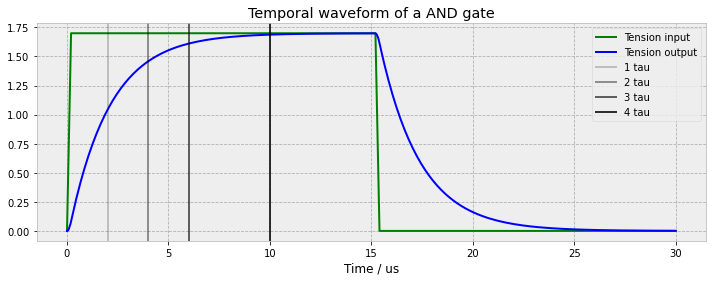

In [13]:
# Plot the transient waveforms
plt.figure(figsize=(12, 4))
plt.title("Temporal waveform of a AND gate")

# Input signals 
plt.plot(analysis.time * 1e6, np.array(analysis["vin"]) , label="Tension input", c="green")
plt.plot(analysis.time * 1e6, np.array(analysis["vout"]), label="Tension output", c="blue")

# Visualization tau
plt.axvline(1*tau*1e6, c="black", alpha=0.2, label="1 tau")
plt.axvline(2*tau*1e6, c="black", alpha=0.4, label="2 tau")
plt.axvline(3*tau*1e6, c="black", alpha=0.6, label="3 tau")
plt.axvline(5*tau*1e6, c="black", alpha=0.8, label="4 tau")

# Axis labels and legend
plt.xlabel("Time / us")
plt.legend()
plt.show()

## Energy in the Circuit

The objective of this section is to **analyze the energy in the RC circuit**, more precisely:

* the **energy dissipated in the resistor**
* the **energy stored in the capacitor**

We start by focusing on the energy stored in the capacitor during the charging process.

### Energy Stored in the Capacitor

The instantaneous electrical power absorbed by a component is given by:

$$p(t) = v(t) \cdot i(t)$$

Therefore, the energy stored in the capacitor is obtained by integrating the power over time:

$$E_C = \int v(t) i(t) dt$$

For a capacitor, the current–voltage relationship is:

$$i(t) = C \frac{dv(t)}{dt}$$

Substituting this expression into the energy equation gives:

$$E_C = \int v_C(t) C \frac{dv_C(t)}{dt} dt$$

#### Change of Variables

The input voltage is a **Heaviside step function**, which means that the capacitor charges from an initial voltage of zero to a final steady-state voltage.

The energy accumulated during the entire charging process can therefore be written as:

$$E_C = \int_{0}^{\infty} v_C(t) C \frac{dv_C(t)}{dt} dt$$

Since:

$$\frac{dv_C(t)}{dt} dt = dv_C(t)$$

we can change the variable of integration from **time** to **capacitor voltage**:

$$E_C = \int v_C C dv_C$$

#### Integration Limits

The limits of integration are determined by the capacitor voltage:

* At $t = 0$: the capacitor is **uncharged**
  $$v_C(0) = 0 \ \text{V}$$

* At $t \rightarrow \infty$: the capacitor is **fully charged**
  $$v_C(\infty) = V_0$$

The energy expression becomes:

$$E_C = \int_{0}^{V_0} v_C C dv_C$$

#### Final Result

Integrating the expression:

$$E_C = C \left[\frac{v_C^2}{2}\right]_0^{V_0}$$

yields:

$$E_C = \frac{1}{2} C V_0^2$$

#### Important Physical Interpretation

This result shows that:

* the energy stored in a capacitor depends **only** on its capacitance and the final voltage
* it does **not** depend on the resistance value
* exactly **half of the energy delivered by the source** during charging is stored in the capacitor

### Energy Dissipated in the Resistor

The instantaneous power dissipated by a resistor is given by Joule’s law:

$$P_R(t) = R i^2(t)$$

The total energy dissipated in the resistor is obtained by integrating this power over time:

$$E_R = \int_{0}^{\infty} R i^2(t) dt$$

### Current During Capacitor Charging

For a step input voltage of amplitude $V_0$, the current in an RC charging circuit is:

$$i(t) = \frac{V_0}{R} e^{-t/RC}$$

This expression shows that:

* the current is **maximum at $t = 0$**
* it **decreases exponentially** as the capacitor charges
* the decay rate is governed by the time constant $\tau = RC$


#### Energy Calculation

Substituting the expression of the current into the energy equation gives:

$$E_R = \int_{0}^{\infty} R \left(\frac{V_0}{R}\right)^2 e^{-2t/RC} dt$$

Simplifying the expression:

$$E_R = \frac{V_0^2}{R} \int_{0}^{\infty} e^{-2t/RC} dt$$

The integral evaluates to:

$$\int_{0}^{\infty} e^{-2t/RC} dt = \frac{RC}{2}$$

#### Final Result

Substituting this result yields:

$$E_R = \frac{V_0^2}{R} \cdot \frac{RC}{2}$$

$$E_R = \frac{1}{2} C V_0^2$$


#### Key Interpretation

This result is remarkable because it shows that:

* the energy dissipated in the resistor is **exactly equal** to the energy stored in the capacitor
* this equality is **independent of the resistance value**
* half of the energy provided by the voltage source is **lost as heat**, and half is **stored electrically**

This explains why resistive losses are unavoidable in RC charging circuits and highlights the fundamental energy balance of first-order systems.

### Energy Supplied by the Source

To complete the energy analysis of the RC circuit, we now determine the **energy delivered by the voltage source** during the charging process.

#### Source Power

The instantaneous power provided by an ideal voltage source is:

$$P_{\text{source}}(t) = V_0 \cdot i(t)$$

#### Energy Supplied by the Source

The total energy delivered by the source is obtained by integrating the power over time:

$$E_{\text{source}} = \int_{0}^{\infty} V_0 i(t) dt$$


#### Calculation

For a step input of amplitude $V_0$, the current is:

$$i(t) = \frac{V_0}{R} e^{-t/RC}$$

Substituting into the energy expression:

$$E_{\text{source}} = \int_{0}^{\infty} V_0 \frac{V_0}{R} e^{-t/RC} dt$$

$$E_{\text{source}} = \frac{V_0^2}{R} \int_{0}^{\infty} e^{-t/RC} dt$$

The integral evaluates to:

$$\int_{0}^{\infty} e^{-t/RC} dt = RC$$

```{note} Demonstration
We want to compute the following integral:

$$g = \int_{0}^{\infty} e^{-t/RC} \ dt$$

The antiderivative of $e^{-t/RC}$ is:

$$\int e^{-t/RC} dt = -RC \ e^{-t/RC}$$

Evaluating this expression between the limits $0$ and $\infty$:

$$g = \left[ -RC \ e^{-t/RC} \right]_{0}^{\infty}$$

$$g = -RC \left( e^{-\infty/RC} - e^{-0/RC} \right)$$

Since:
* $e^{-\infty/RC} = 0$
* $e^{-0/RC} = 1$

we obtain:

$$g = -RC (0 - 1)$$
$$g = RC$$

Therefore, the final result is:

$$\int_{0}^{\infty} e^{-t/RC} \ dt = RC$$
```

Thus, the energy supplied by the source is:

$$E_{\text{source}} = C V_0^2$$

### Energy Balance

The total energy provided by the source is shared between the capacitor and the resistor:

$$E_{\text{source}} = E_C + E_R$$

Substituting the previously obtained results:

$$C V_0^2 = \frac{1}{2} C V_0^2 + \frac{1}{2} C V_0^2$$

### Experimental Verification

The objective of this section is to compare the energy supplied by the voltage source obtained from simulation with the theoretical energy derived analytically.

#### Experimental Energy from Simulation

The experimental energy is computed by integrating the instantaneous power delivered by the source over a finite time window.

Since the simulation does not run up to infinity, the integration is performed over the first 15 µs.

In [14]:
# Time window selection
dive = slice(0, int(15 // 0.2))

time = analysis.time[dive]
current = analysis.branches["vvin"][dive]
voltage = analysis.nodes["vin"][dive]

# Numerical integration of source power
energy_exp = np.abs(integrate.simpson(voltage * current, x=time))

#### Theoretical Energy Supplied by the Source

For an ideal RC circuit excited by a step input $V_{DD}$, the total energy supplied by the source over infinite time is:

$$E_{source} = C \cdot V_{DD}^2$$

In [15]:
energy_theo = VDD**2 * C1 * 1e-9

In [16]:
print('Comparison between theoretical and experimental results')
print('Objective: calculate the energy supplied by the source\n')
print(f'Experimental energy : E_exp = {energy_exp*1e9:.2f} nJ')
print(f'Theoretical energy  : E_the = {energy_theo*1e9:.2f} nJ')

Comparison between theoretical and experimental results
Objective: calculate the energy supplied by the source

Experimental energy : E_exp = 566.65 nJ
Theoretical energy  : E_the = 578.00 nJ


A discrepancy can be observed between the two values.
This difference is mainly due to the integration limits:

The theoretical energy is computed over an infinite time

The experimental energy is computed only up to $15 \ µs$.

#### Improved Theoretical Energy for Finite Time

To obtain a more accurate comparison, the theoretical energy can be recalculated for a finite integration time:

$$E_{source}(t) = C \cdot V_{DD}^2 \cdot (1−e^{\frac{-t}{RC}})$$

In [17]:
energy_recalc = (VDD**2 * C1 * 1e-9) * \
                (1 - np.exp(-np.float64(time[-1]) / (R1 * C1 * 1e-9)))

In [18]:
print('Comparison between theoretical and experimental results')
print('Objective: calculate the energy supplied by the source')
print(f'Experimental energy           : E_exp  = {energy_exp*1e9:.3f} nJ')
print(f'Theoretical energy (finite t) : E_the2 = {energy_recalc*1e9:.3f} nJ')
print(f'Theoretical energy (infinite) : E_the1 = {energy_theo*1e9:.3f} nJ')

Comparison between theoretical and experimental results
Objective: calculate the energy supplied by the source
Experimental energy           : E_exp  = 566.646 nJ
Theoretical energy (finite t) : E_the2 = 576.462 nJ
Theoretical energy (infinite) : E_the1 = 578.000 nJ


### Conclusion

* The voltage source supplies **100%** of the energy
* The capacitor stores **50%** of the energy
* The resistor dissipates **50%** of the energy as heat

Most importantly:

* **Regardless of the value of $R$**, exactly **50% of the supplied energy is dissipated**

This result is fundamental in circuit theory and explains why resistive losses cannot be avoided in simple RC charging circuits.

## Z-Parameters

The objective of this section is to **calculate all the Z-parameters** of the two-port network.
Once the Z-parameters are known, it is then possible to derive the other parameter sets (**Y, H, G, A, B**).

The Z-parameter representation is defined as:

$$
\begin{bmatrix}
V_1 \\
V_2
\end{bmatrix} =
\begin{bmatrix}
Z_{11} & Z_{12} \\
Z_{21} & Z_{22}
\end{bmatrix}
\begin{bmatrix}
I_1 \\
I_2
\end{bmatrix}
$$

This matrix equation can be rewritten as:

$$
\begin{cases}
V_1 = Z_{11} I_1 + Z_{12} I_2 \\
V_2 = Z_{21} I_1 + Z_{22} I_2
\end{cases}
$$

The goal of this part is therefore to compute all four parameters:
$$
Z_{11}; \ Z_{12}; \ Z_{21}; \ Z_{22}
$$

### Parameter Calculation

As a reminder, to determine the Z-parameters of a **T-network**, the equations are obtained using **Kirchhoff’s Voltage Law (KVL)** applied to the loops shown in [](#circuit_T).

```{figure} ./images/circuit_T.svg
:name: circuit_T
:align: center
:width: 400px

T-circuit network
```

The resulting equations are:

$$
\begin{cases}
V_1 = Z_1 I_1 + Z_3 (I_1 + I_2) = (Z_1 + Z_3) I_1 + Z_3 I_2 \\
V_2 = Z_2 I_2 + Z_3 (I_1 + I_2) = Z_3 I_1 + (Z_2 + Z_3) I_2
\end{cases}
$$

By identification, the impedances are:

* $Z_1 = R$
* $Z_2 = \frac{1}{j \omega C}$
* $Z_3 = 0$

This leads to the following expressions:

$$
\begin{cases}
V_1 = \left(R + \frac{1}{j \omega C}\right) I_1 + \frac{1}{j \omega C} I_2 \\
V_2 = \frac{1}{j \omega C} I_1 + \left(R + \frac{1}{j \omega C}\right) I_2
\end{cases}
$$

The Z-parameter matrix therefore becomes:

$$
\begin{bmatrix}
V_1 \\
V_2
\end{bmatrix}=
\begin{bmatrix}
R + \frac{1}{j \omega C} & \frac{1}{j \omega C} \\
\frac{1}{j \omega C} & R + \frac{1}{j \omega C}
\end{bmatrix}
\begin{bmatrix}
I_1 \\
I_2
\end{bmatrix}
$$

### Properties of the Two-Port Network

This two-port network has the following properties:

* **Passive**
  It contains no power supply or biasing circuit; all components are passive.

* **Linear**
  The circuit is linear because it is composed only of linear elements.

* **Reciprocal**
  The response is identical regardless of which port is used as the input or output.

### Physical Interpretation

The Z-parameters can be interpreted physically as follows:

* **Diagonal terms** → local impedances seen at each port
* **Off-diagonal terms** → **coupling between the two ports**
* A smaller capacitance $C$ → stronger coupling at high frequency

### Experimental Determination

Experimentally, each Z-parameter can be measured using:

$$
Z_{ij} = \frac{V_i}{I_j}
\quad \text{with the other current set to zero}
$$

This method allows direct extraction of each parameter from measurements.

#### Z11 & Z21

We see two method, for extract the value. The fisrt is with current source, the problem with this method is mandatory to a output resistance. The other solution is to inject a tension. With this solution it is not the problem of the resistance output.

##### Solution with curent source

In [19]:
circuit = Circuit('Z-parameter extraction classic solution but with output resistance')

# Source de courant AC de test
circuit.I('test', 'vin', circuit.gnd, 1 @ u_A)  # 1 A → facile pour Z = V

# RC
circuit.R(1, 'vin', 'vout', R1 @ u_Ohm)
circuit.C(1, 'vout', circuit.gnd, C1 @ u_nF)
circuit.R(2, 'vout', circuit.gnd, 100 @ u_MOhm) # Mandatory for the simulation, 

simulator = circuit.simulator()
analysis = simulator.ac(start_frequency=10@u_Hz,
                         stop_frequency=1@u_MHz,
                         number_of_points=100,
                         variation='dec')

##### Solution with tension source

In [20]:
circuit = Circuit('Z-parameter extraction')

# Source de tension AC de t
circuit.SinusoidalVoltageSource('in', 'vin', circuit.gnd, amplitude=1 @ u_V, frequency=1@u_Hz)

# RC
circuit.R(1, 'vin', 'vout', R1 @ u_Ohm)
circuit.C(1, 'vout', circuit.gnd, C1 @ u_nF)

circuit.C1.minus.add_current_probe(circuit)

simulator = circuit.simulator()
analysis = simulator.ac(start_frequency=100@u_Hz,
                         stop_frequency=1@u_MHz,
                         number_of_points=100,
                         variation='dec')

In [21]:
freq = np.array(analysis.frequency)
Z11  = analysis.nodes["vin"] / analysis.branches["vc1_minus"]
Z21  = analysis.nodes["vout"] / analysis.branches["vin"]

In [22]:
Z11_theo = (R1 + 1/(2j*np.pi*freq*C1*1e-9))
Z21_theo = (1/(2j*np.pi*freq*C1*1e-9))

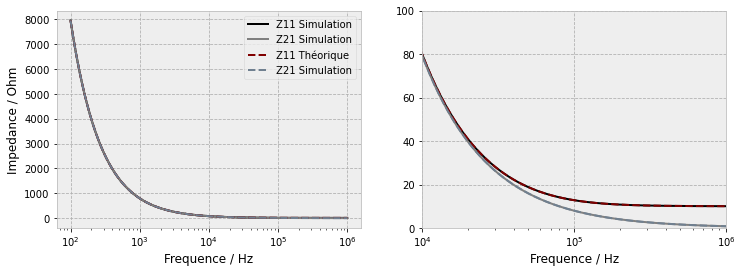

In [23]:
plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.semilogx(freq, np.abs(Z11), label="Z11 Simulation", c="black")
plt.semilogx(freq, np.abs(Z21), label="Z21 Simulation", c="grey")

plt.semilogx(freq, np.abs(Z11_theo), "--", label="Z11 Théorique", c="maroon")
plt.semilogx(freq, np.abs(Z21), "--", label="Z21 Simulation", c="slategrey")

plt.xlabel("Frequence / Hz")
plt.ylabel("Impedance / Ohm")

plt.legend()

plt.subplot(122)
plt.semilogx(freq, np.abs(Z11), label="Z11 Simulation", c="black")
plt.semilogx(freq, np.abs(Z21), label="Z21 Simulation", c="grey")

plt.semilogx(freq, np.abs(Z11_theo), "--" , label="Z11 Théorique", c="maroon")
plt.semilogx(freq, np.abs(Z21), "--", label="Z21 Simulation", c="slategrey")

plt.xlabel("Frequence / Hz")
plt.xlim(1e4, 1e6)
plt.ylim(0, 100)

plt.show()

Il est possible de voir l'intéret de la résistance qu'à haute fréquence, lorsqu'on est a basse fréquence. C'est surtout l'impédance de la capacité qui joue un rôle alors qu'a haute fréquence c'est surtout la résistance qui joue un rôle primodiale sur les valeurs. 

#### Z12 & Z22

In [26]:
circuit = Circuit('Z-parameter extraction')

# Source de tension AC de t
circuit.SinusoidalVoltageSource('in', 'vout', circuit.gnd, amplitude=1 @ u_V, frequency=1@u_Hz)

circuit.R(1, 'vin', 'vout', R1 @ u_Ohm)
circuit.C(1, 'vout', circuit.gnd, C1 @ u_nF)

circuit.C1.minus.add_current_probe(circuit)

simulator = circuit.simulator()
analysis = simulator.ac(start_frequency=1@u_Hz,
                         stop_frequency=1@u_MHz,
                         number_of_points=100,
                         variation='dec')

In [31]:
freq = np.array(analysis.frequency)
Z12  = analysis.nodes["vin"] / analysis.branches["vin"]
Z22  = analysis.nodes["vout"] / analysis.branches["vc1_minus"]

In [32]:
Z22_theo = (R1 + 1/(2j*np.pi*freq*C1*1e-9))
Z12_theo = (1/(2j*np.pi*freq*C1*1e-9))

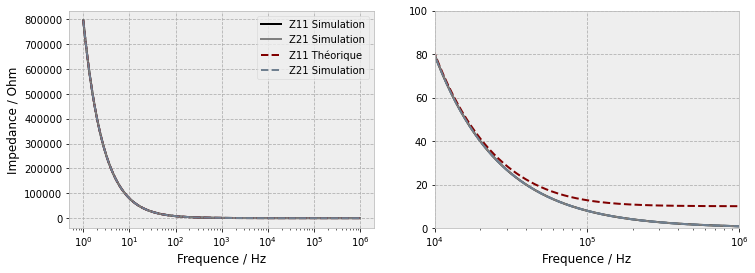

In [33]:
plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.semilogx(freq, np.abs(Z22), label="Z11 Simulation", c="black")
plt.semilogx(freq, np.abs(Z12), label="Z21 Simulation", c="grey")

plt.semilogx(freq, np.abs(Z22_theo), "--", label="Z11 Théorique", c="maroon")
plt.semilogx(freq, np.abs(Z12), "--", label="Z21 Simulation", c="slategrey")

plt.xlabel("Frequence / Hz")
plt.ylabel("Impedance / Ohm")

plt.legend()

plt.subplot(122)
plt.semilogx(freq, np.abs(Z22), label="Z11 Simulation", c="black")
plt.semilogx(freq, np.abs(Z12), label="Z21 Simulation", c="grey")

plt.semilogx(freq, np.abs(Z22_theo), "--" , label="Z11 Théorique", c="maroon")
plt.semilogx(freq, np.abs(Z12), "--", label="Z21 Théorique", c="slategrey")

plt.xlabel("Frequence / Hz")
plt.xlim(1e4, 1e6)
plt.ylim(0, 100)

plt.show()

## State-Space Representation

The objective of this section is to **derive the state-space model** of the circuit and, from it, obtain the transfer function.
All intermediate calculation steps are presented in detail.

### Introduction

We first assume that **no current source is connected at the output**, therefore:

$$I_2 = 0$$

This leads to the following relations:

$$\begin{cases}
V_{in} = (Z_1 + Z_3) I_1 \
V_{out} = V_C = Z_3 I_1
\end{cases}$$

Substituting the impedance expressions gives:

$$\begin{cases}
V_{in}(\omega) = \left(R + \dfrac{1}{j \omega C}\right) I_1 \
V_{out}(\omega) = V_C(\omega) = \dfrac{1}{j \omega C} I_1
\end{cases}$$

Which can be rewritten as:

$$\begin{cases}
V_{in}(\omega) = R I_1 + \dfrac{1}{j \omega C} I_1 \
V_{out}(\omega) = V_C(\omega) = \dfrac{1}{j \omega C} I_1
\end{cases}$$

### Time-Domain Conversion

From the output equation in the frequency domain:

$$V_{out}(\omega) = \dfrac{1}{j \omega C} I_1$$

Taking the inverse transform yields:

$$V_{out}(t) = \frac{1}{C} \int i(t) \ dt$$

Now, considering the input equation:

$$V_{in}(\omega) = R I_1 + \dfrac{1}{j \omega C} I_1$$

Returning to the time domain:

$$V_{in}(t) = R i(t) + \frac{1}{C} \int i(t) \ dt$$

Since:

$$V_{out}(t) = \frac{1}{C} \int i(t) \ dt$$

we obtain:

$$V_{in}(t) = R i(t) + V_{out}(t)$$

### State Variable Definition

To simplify the notation, we define:

* $x(t) = V_{out}(t)$ (state variable)
* $u(t) = V_{in}(t)$ (input)

Thus:

$$u(t) = R i(t) + x(t)$$

From the capacitor current law:

$$i(t) = C \frac{dV_{out}(t)}{dt} = C \dot{x}(t)$$

Substituting into the previous equation:

$$u(t) = R C \dot{x}(t) + x(t)$$

Rearranging terms:

$$R C \dot{x}(t) = u(t) - x(t)$$

$$\dot{x}(t) = -\frac{1}{R C} x(t) + \frac{1}{R C} u(t)$$

### Output Equation

Since the output voltage is the state variable itself:

$$y(t) = V_{out}(t) = x(t)$$

### Final State-Space Model

The complete state-space representation of the system is:

$$\begin{cases}
\dot{x}(t) = -\dfrac{1}{R C} x(t) + \dfrac{1}{R C} u(t) \\
y(t) = x(t)
\end{cases}$$

By identification with the standard form:

$$\begin{cases}
\dot{x}(t) = A x(t) + B u(t) \\
y(t) = C x(t) + D u(t)
\end{cases}$$

we obtain:

$$A = \begin{bmatrix}-\frac{1}{R C}\end{bmatrix},
\quad
B = \begin{bmatrix}\frac{1}{R C}\end{bmatrix}$$

$$C = \begin{bmatrix}1\end{bmatrix},
\quad
D = \begin{bmatrix}0\end{bmatrix}$$

## Transfer Function

At the beginning of this report, one method for computing the transfer function of the system was presented.
In this section, the objective is to **derive the transfer function using a different approach**, based on the results obtained in the previous section (*State-Space Representation*).

The transfer function of a linear time-invariant (LTI) system can be obtained from its state-space representation using the following formula:

$$H(s) = C (sI - A)^{-1} B + D$$

```{note}
It is possible to move from the Laplace-domain representation ($s$) to the phasor representation ($j\omega$) without difficulty by simply replacing $s$ with $j\omega$.

This substitution does not change the underlying reasoning.
```

### Transfer Function Derivation

By substituting the state-space matrices into the formula, we obtain:

$$
H(s) =
\begin{bmatrix} 1 \end{bmatrix}\left(s \begin{bmatrix} 1 \end{bmatrix} - 
\begin{bmatrix} -\frac{1}{RC} \end{bmatrix}\right)^{-1}
\begin{bmatrix} \frac{1}{RC} \end{bmatrix} +
\begin{bmatrix} 0 \end{bmatrix}
$$

Which simplifies to:

$$
H(s) =
\left(
\begin{bmatrix} s \end{bmatrix}+
\begin{bmatrix} \frac{1}{RC} \end{bmatrix}\right)^{-1}
\begin{bmatrix} \frac{1}{RC} \end{bmatrix}
$$

$$
H(s) =
\begin{bmatrix}
s + \frac{1}{RC}
\end{bmatrix}^{-1}
\begin{bmatrix}
\frac{1}{RC}
\end{bmatrix}
$$

Rewriting the expression:

$$
H(s) =
\begin{bmatrix}
\frac{1 + sRC}{RC}
\end{bmatrix}^{-1}
\begin{bmatrix}
\frac{1}{RC}
\end{bmatrix}
$$

$$
H(s) =
\begin{bmatrix}
\frac{RC}{1 + sRC}
\end{bmatrix}
\begin{bmatrix}
\frac{1}{RC}
\end{bmatrix}
$$

Thus, the transfer function becomes:

$$
H(s) =
\begin{bmatrix}
\frac{1}{1 + sRC}
\end{bmatrix}
$$

Returning to the phasor domain, the transfer function can be written as:

$$
H(\omega) =
\begin{bmatrix}
\frac{1}{1 + j\omega RC}
\end{bmatrix}
$$

### Output Calculation

Since the transfer function has been obtained, the system output can now be computed from the state-space equations:

$$
\begin{cases}
\dot{x}(t) = A x(t) + B u(t) \\
y(t) = C x(t) + D u(t)
\end{cases}
$$

Taking the Laplace transform while accounting for **initial conditions**, we obtain:

$$\mathcal{L}{\dot{x}(t)} = sX(s) - x(0)$$

Substituting into the state equation yields:

$$sX(s) - x(0) = A X(s) + B U(s)$$

$$(sI - A) X(s) = B U(s) + x(0)$$

$$X(s) = (sI - A)^{-1} \left[ B U(s) + x(0) \right]$$

Injecting $X(s)$ into the output equation:

$$Y(s) = C X(s) + D U(s)$$

$$
Y(s) = C (sI - A)^{-1} B U(s) + C (sI - A)^{-1} x(0) + D U(s)
$$

Factoring by $U(s)$, we obtain:

$$Y(s) = U(s) \left[ C (sI - A)^{-1} B + D \right] + C (sI - A)^{-1} x(0)$$

Recognizing the transfer function $H(s)$, the final expression becomes:

$$Y(s) = U(s) H(s) + C (sI - A)^{-1} x(0)$$

### Interpretation

$$Y(s) = \underbrace{U(s) H(s)}_{\text{Input contribution}} + \underbrace{C (sI - A)^{-1} x(0)}_{\text{Initial conditions contribution}}$$

This result shows that the system output is composed of:

* a forced response due to the input signal,
* and a natural response due to the initial conditions.

## Reference

## Writing Matrix

| Author | Reviewer | Approver | Section | Date 1 | Date 2 | Date 3 | General Remarks |
|--------|----------|----------|---------|--------|--------|--------|------------------|
| Sacha  | /        | /        | Entire document | 2026-01-20 | / | / | Initial draft of the full document |